<a href="https://colab.research.google.com/github/Ruthnguli/Titanic-Prediction-Spambase-Detection/blob/main/Ruth_DS_ML__K_Nearest_Neighbours_(KNN)_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbours (KNN): Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict the survival status of individual passengers on the titanic accident.

### b) Defining the Metric for Success

The metric of success will be attained if the model has a higher f1 score and also looking at the performance in a confusion matrix. 

### c) Understanding the context 

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean on 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

### d) Recording the Experimental Design

1. Loading data
2. Reading data
3. Tyding data
4. Performing Exploratory Data Analysis
5. Creating K-Nearest Neighbor prediction model

## 2. Reading the Data

Import necessary libraries

In [ ]:
# importing libraries and algorathms
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the Data from the sources i.e. csv  (train and test datasets)
#
train = pd.read_csv("train (5).csv",delimiter=",", encoding='utf-8')

test = pd.read_csv("test (1).csv",delimiter=",", encoding='utf-8')



## 3. Checking the Data

In [ ]:
# Determining the no. of records in our datasets
#
print("Train: ",train.shape)
print("\n")
print("Test: ", test.shape)

Train:  (891, 12)


Test:  (418, 11)


In [ ]:
# Previewing the top of our datasets
#
print("Train: ",train.head())
print("\n")
print("Test: ", test.head())

Train:     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


Test:     PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


In [ ]:
# Previewing the bottom of our datasets
# 
print("Train: "),train.tail()
print("\n")
print("Test: ", test.tail())

Train: 


Test:       PassengerId  Pclass                          Name  ...      Fare  Cabin  Embarked
413         1305       3            Spector, Mr. Woolf  ...    8.0500    NaN         S
414         1306       1  Oliva y Ocana, Dona. Fermina  ...  108.9000   C105         C
415         1307       3  Saether, Mr. Simon Sivertsen  ...    7.2500    NaN         S
416         1308       3           Ware, Mr. Frederick  ...    8.0500    NaN         S
417         1309       3      Peter, Master. Michael J  ...   22.3583    NaN         C

[5 rows x 11 columns]


In [ ]:
# Checking whether datasets' columns have appropriate datatype
#
print("Train: ",train.dtypes)
print("\n")
print("Test: ", test.dtypes)

Train:  PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Test:  PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
# Getting the information of the datasets
#
print("Train: ",train.info())
print("\n")
print("Test: ", test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Train:  None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64 

In [ ]:
# checking column names in  both datasets
#
print("Train: ",train.columns)
print("\n")
print("Test: ", test.columns)

Train:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Test:  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## 4. Tidying the Dataset

In [ ]:
# Aligning data and removing space from train and test dataset
#
train.columns = train.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')

test.columns = test.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(','').str.replace(')','')

# confirming columns names in train and test datasets
#
print("Train: ",train.columns)
print("\n")
print("Test: ", test.columns)

Train:  Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


Test:  Index(['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')


In [ ]:
# Checking for the unique values in each column for train datasaet
#
for column in train.columns:
  print(column)
  print(train[column].nunique())
  print(train[column].unique())
  print('\n')

passengerid
891
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 24

In [ ]:
# Checking for the unique values in each column for test dataset
#
for column in test.columns:
  print(column)
  print(test[column].nunique())
  print(test[column].unique())
  print('\n')

passengerid
418
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 

In [ ]:
# Checking for Outliers
#
# Checking for Outliers using box plots for train dataset
#
num_col = train [['survived',	'pclass', 'age',	'sibsp',	'parch', 'fare'	]]

fig,ax = plt.subplots(len(num_col),figsize = (18,15))

for i, col_val in enumerate(num_col):
  sns.boxplot(x=train[col_val], ax=ax[i])
  ax[i].set_title('{} Box Plot'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

  plt.show()

In [ ]:
# Identifying the Missing Data from train and test
#
print("Train: ",train.isna().sum().sum())
print("\n")
print("Test: ", test.isna().sum().sum())


Train:  866


Test:  414


In [ ]:
# Checking for percentage of missing values in train dataset
#
(train.isna().mean().round(4) * 100).sort_values(ascending = False)

cabin          77.10
age            19.87
embarked        0.22
passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
dtype: float64

In [ ]:
# Checking for percentage of missing values in test dataset
#
(train.isna().mean().round(4) * 100).sort_values(ascending = False)

cabin          77.10
age            19.87
embarked        0.22
passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
dtype: float64

from both train and test datasets Cabin column has 77% of missing values which very high.

In [ ]:
# Filling missing values in train dataset the categorical  column with mode
#
train.sex.fillna(train.embarked.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
#
train.fillna(train.age.mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
#
train.isnull().sum().any()

False

In [ ]:
# Filling missing values in test dataset the categorical  column with mode
#
test.sex.fillna(test.embarked.mode()[0], inplace = True)

# Filling missing values in numerical columns with mean
#
test.fillna(test.age.mean(), inplace = True)
  
# Checking whether the missing values have been filled appriopriately
#
test.isnull().sum().any()

False

In [ ]:
# Dealing with the Missing Data by dropping cabin column in both datasets as it has 77% of data missing
# Drop unnecessary columns like passerid, ticket  and name in train dataset
#
train.drop(['cabin', 'passengerid', 'name', 'ticket'], axis=1, inplace=True)

In [ ]:
# Dealing with the Missing Data by dropping cabin column in both datasets as it has 77% of data missing
# Drop unnecessary columns like passerid, ticket  and name in test dataset
#
test.drop(['cabin', 'passengerid', 'name', 'ticket'], axis=1, inplace=True)

In [ ]:
# Identifying duplicates in both train and test datasets
#
print("train: ",train.duplicated().any())
print("train: ",len(train[train.duplicated()]))
print(" ")

print("test: ",test.duplicated().any())

print("test: ",len(test[test.duplicated()]))

train:  True
train:  111
 
test:  True
test:  38


There are 111 in train dataset, Test data has 38 duplicates.

In [ ]:
# Dealing with duplicates in test datasets
#
test.drop_duplicates(keep='first', inplace=True)
test.duplicated().any()

False

In [ ]:
# Dealing with duplicates in test datasets
#
test.drop_duplicates(keep='first', inplace=True)
test.duplicated().any()

False

## 5. Exploratory Analysis

### a) Univariate

In [ ]:
# describing the train datasets
#
train.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# describing the test datasets
#
test.describe()

,pclass,age,sibsp,parch,fare
count,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.218421,30.316606,0.484211,0.431579,38.132209
std,0.851618,13.225585,0.925889,1.021176,57.945812
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,22.000000,0.000000,0.000000,7.925000
50%,2.000000,30.000000,0.000000,0.000000,15.372900
75%,3.000000,36.125000,1.000000,0.000000,36.813550
max,3.000000,76.000000,8.000000,9.000000,512.329200


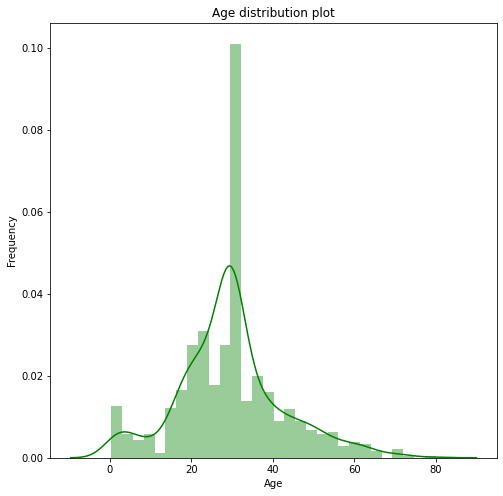

In [ ]:
# Ploting a histogram to show train age distribution
#
plt.figure(figsize = [8,8])
sns.distplot(train['age'], color = 'green')
plt.title('Age distribution plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

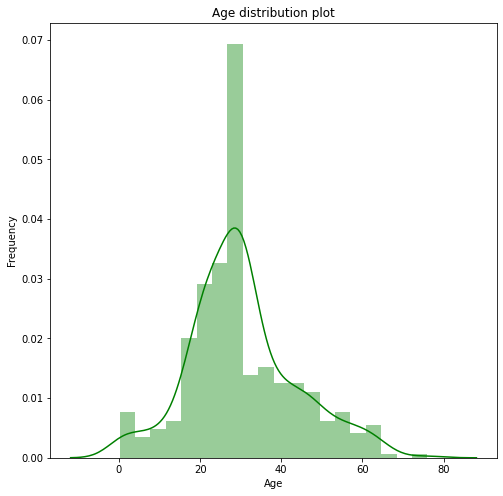

In [ ]:
# Ploting a histogram to show test age distribution
#
plt.figure(figsize = [8,8])
sns.distplot(test['age'], color = 'green')
plt.title('Age distribution plot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show();

We observe that age is skewed to the right in both datasets.

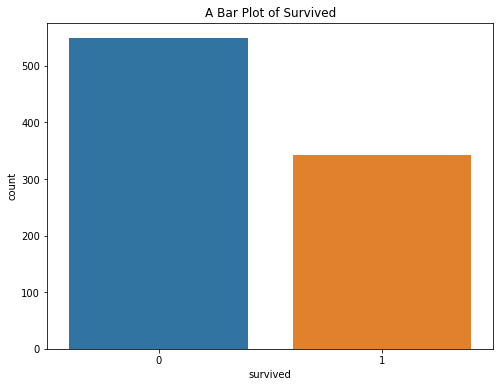

In [ ]:
# plotting a bar chat of survived variable
# 
plt.figure(figsize =(8, 6))
sns.countplot(train.survived)
plt.title('A Bar Plot of Survived')
plt.show()

Most of pessangers in the Titanic didn't survive.

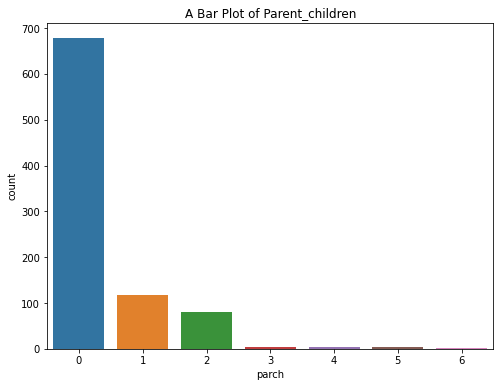

In [ ]:
# plotting a bar chat of parch variable
# 
plt.figure(figsize =(8, 6))
sns.countplot(train.parch)
plt.title('A Bar Plot of Parent_children')
plt.show()

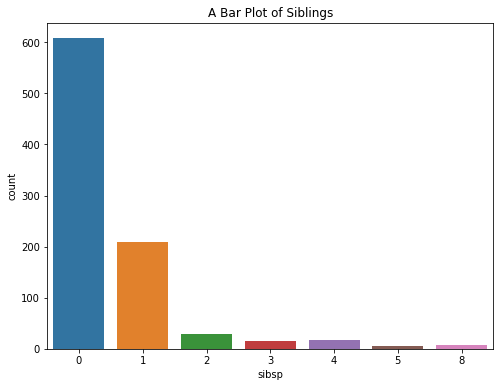

In [ ]:
# plotting a bar chat of sibs variable
# 
plt.figure(figsize =(8, 6))
sns.countplot(train.sibsp)
plt.title('A Bar Plot of Siblings')
plt.show()

Most of the passsengers did not have parent and child or siblings on board.

### b) Bivariate

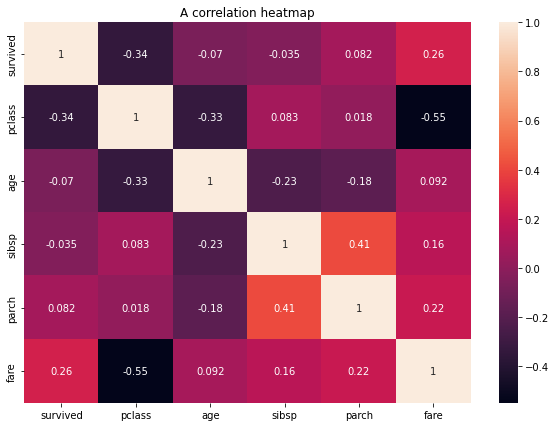

In [ ]:
# A heatmap to show correlation
#
plt.figure(figsize=[10, 7])
sns.heatmap(train.corr(), annot=True)
plt. title('A correlation heatmap')
plt.show();

fare is 0.26 and parch 0.082 are positively correlated to survived where as sibsp -0.035, age -0.077 and pclass -0.34 have a negative correlation to survived.

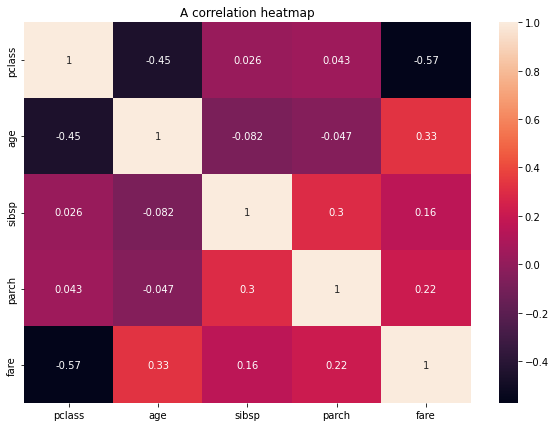

In [ ]:
# A heatmap to show test correlation
#
plt.figure(figsize=[10, 7])
sns.heatmap(test.corr(), annot=True)
plt. title('A correlation heatmap')
plt.show();

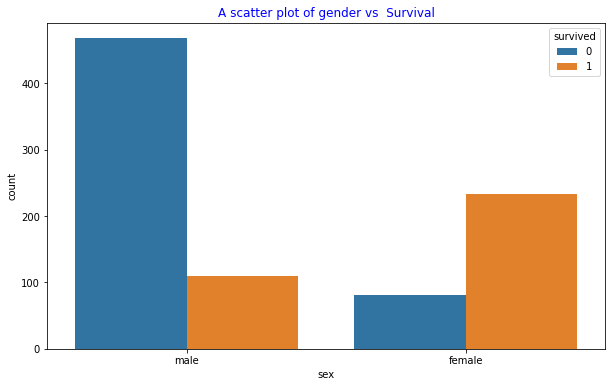

In [ ]:
# Plotting a bar plot of sexvs survival
#
plt.figure(figsize=[10, 6])
sns.countplot(x = train["sex"], hue = train["survived"])
plt.title("A scatter plot of gender vs  Survival", color = 'Blue')
plt.show();

We observe that more female passengers survived compared to male .

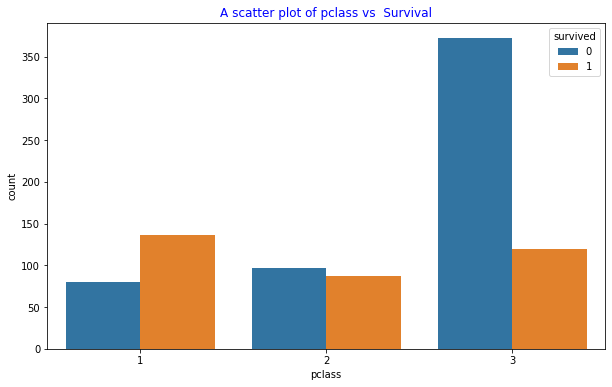

In [ ]:
# Plotting a bar plot of pclass vs survival
#
plt.figure(figsize=[10, 6])
sns.countplot(x = train["pclass"], hue = train["survived"])
plt.title("A scatter plot of pclass vs  Survival", color = 'Blue')
plt.show();

passangers in 1 st class show that those who survided were more. in third class majority did not survive.

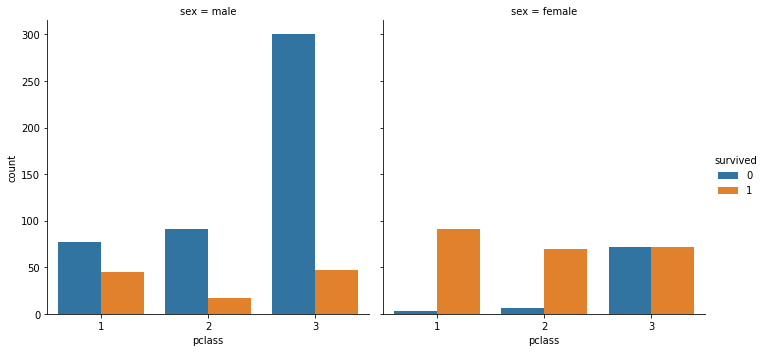

In [ ]:
# Plotting a bar plot of pclass, sex vs survival
#
sns.catplot(data=train,col = "sex",x = "pclass", hue="survived",kind = "count")


We observe that male passengers in both clasess had a low survival. While female passengers had high chance of survival.

<Figure size 720x720 with 0 Axes>

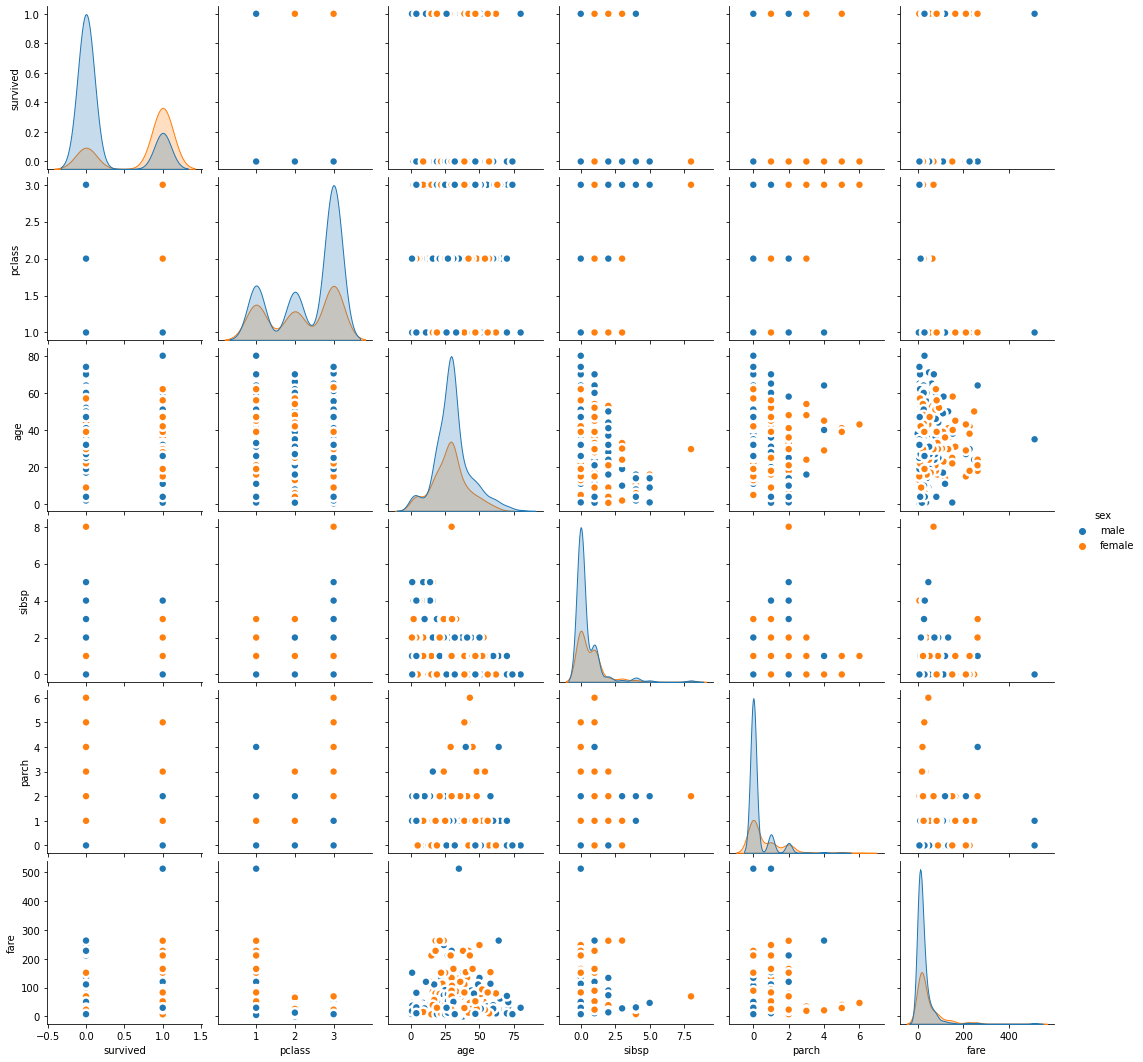

In [ ]:
# A pair plot 
#
plt.figure(figsize =[10,10])
sns.pairplot(train, kind="scatter", hue="sex", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

### C) Multivariate

In [ ]:
#testing for normality for age
#
from scipy.stats import shapiro 
stat, p = shapiro(train['survived'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
#
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')
 
# testing for normality for GDP hrowth
#
stat, p = shapiro(train['survived'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
#
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.617, p=0.000
Sample does not look Gaussian
Statistics=0.617, p=0.000
Sample does not look Gaussian


#### Data Reduction

In [ ]:
# Data Reduction
# Identify X (independet) and y(dependent) features
#
X = train.drop(['survived'], axis=1)
y = train['survived']

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Training 80% of the the data
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [ ]:
# Scaling the data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Performing LDA
#
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### 6. Implementing the Solution

1. Randomly partition each dataset into two parts i.e 80 - 20  sets.

2. perform K-nearest neighbor classification.

3. Compute the accuracy (percentage of correct classification).

4. Report the confusion matrix of each classifier.

5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.

7. Provide further recommendations to improve both classifiers.

In [ ]:
# Creating a KNN model
#
KNN= KNeighborsClassifier()
model = KNN.fit(X_train, y_train)
# predicting the model
#
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0])

In [ ]:
# Evaluating the Performance.  accuracy score, f1 score and confusion matrix
#
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')
print(classification_report(y_test, y_pred))

The accuracy score is: 0.7932960893854749
The f1 score is: 0.7218045112781954
[[94 17]
 [20 48]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       111
           1       0.74      0.71      0.72        68

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



Thi model has attained 79 % accuracy score and F1_score of 72%

In [ ]:
# Splitting the datase to 70-30
# Identify X (independet) and y(dependent) features
#
X = train.drop(['survived'], axis=1)
y = train['survived']

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Training 70% of the the data
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
# Scaling the data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Performing LDA
#
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Creating a KNN model2
#
KNN= KNeighborsClassifier()
model2 = KNN.fit(X_train, y_train)

# predicting the model
#
y_pred = model2.predict(X_test)

# Evaluating the Performance.  accuracy score, f1 score and confusion matrix
#
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')
print(classification_report(y_test, y_pred))

The accuracy score is: 0.7873134328358209
The f1 score is: 0.6984126984126984
[[145  22]
 [ 35  66]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       167
           1       0.75      0.65      0.70       101

    accuracy                           0.79       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.79      0.78       268



Model 2 has 78% accuracy and a 69% f1 score.

In [ ]:
# Splitting the datase to 60-40
# Identify X (independet) and y(dependent) features
#
X = train.drop(['survived'], axis=1)
y = train['survived']

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Training 70% of the the data
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

In [ ]:
# Scaling the data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Performing LDA
#
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
# Creating a KNN model3
#
KNN= KNeighborsClassifier()
model3 = KNN.fit(X_train, y_train)

# predicting the model
#
y_pred = model3.predict(X_test)

# Evaluating the Performance.  accuracy score, f1 score and confusion matrix
#
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')
print(classification_report(y_test, y_pred))

The accuracy score is: 0.7871148459383753
The f1 score is: 0.6984126984126984
[[193  34]
 [ 42  88]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       227
           1       0.72      0.68      0.70       130

    accuracy                           0.79       357
   macro avg       0.77      0.76      0.77       357
weighted avg       0.78      0.79      0.79       357



Model 3 has an accuracy of 78% and 69% F1 score.

Therefore the best perfomed uis the first model splitting data at 80-20% with a f1 score of 72% .

#### Optimizing the model

In [ ]:
#List Hyperparameters that we want to tune.
#
leaf_size = list(range(1,30))
n_neighbors = list(range(1,30))
p=[1,2] 

#Convert to dictionary
#
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
#

knn_2 = KNeighborsClassifier()

#Use GridSearch
# 
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
#
best_model = clf.fit(X,y)

#Print The value of best Hyperparameters
#
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 7
Best p: 1
Best n_neighbors: 7


In [ ]:
# Fitting the best leaf, p and n_neighbors
# Identify X (independet) and y(dependent) features
#
X = train.drop(['survived'], axis=1)
y = train['survived']

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Training 80% of the the data
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scaling the data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Performing LDA
#
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Creating a KNN model3
#
KNN= KNeighborsClassifier(n_neighbors=7, leaf_size=7, p=1)
model3 = KNN.fit(X_train, y_train)

# predicting the model
#
y_pred = model3.predict(X_test)

# Evaluating the Performance.  accuracy score, f1 score and confusion matrix
#
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)

print(f'The accuracy score is: {accuracy}')
print(f'The f1 score is: {score}')
print(f'{cm}')
print(classification_report(y_test, y_pred))

The accuracy score is: 0.8212290502793296
The f1 score is: 0.7500000000000001
[[99 12]
 [20 48]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       111
           1       0.80      0.71      0.75        68

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



after tunimg the model has improved it has an accuracy score of 0.82% and f1_score of 75%.

## 7. Challenging the solution

In [ ]:
# Identify X (independet) and y(dependent) features
#
X = train.drop(['survived'], axis=1)
y = train['survived']

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Training 80% of the the data
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Scaling the data
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Performing LDA
#
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Application of all Machine Learning methods
#
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('XGBC', XGBClassifier()))

# evaluate each model in turn
#
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

RFC: 0.745657 (0.051813)
LR: 0.792058 (0.045192)
SVC: 0.801917 (0.039216)
DTC: 0.749883 (0.049952)
GBC: 0.766784 (0.049912)
XGBC: 0.782199 (0.054574)


Support Vector machine  performs better than other modela with ana ccuracy score of 80%. Therefore SVC can be used as an alternative model.

### 8. Recommendation

The model performs better trained and tested at 80-20%.
Its recommended to Tune the model to increase its performance as its observed the model improved from 79% to 82 perecent.